# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#formatting numbers to 2 decimal places for readibility
pd.options.display.float_format = '{:.2f}'.format

#to suppress any warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Understanding the structure of the data

In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/PGP UT Austin/Project 1 files/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
#Getting the shape of the dataset
df.shape

(1898, 9)

#### Observations:
*   The dataset has 1,898 rows and 9 columns





### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   All the columns have 1898 observations and ther is no missing values
*   The columns *'order_id', 'customer_id', 'food_preparation_time'* and *'delivery time'* are of integer format
*   The *'cost_of_the_order'* column is of float format
*   The columns *'restaurant_name', 'cuisine_type', 'rating', 'day_of_week'* are of object type 





### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
#Checking for missing values using the isnull method
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
 There are no missing values in the dataset columns

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [11]:
# Geting the statistical summary for the dataset using the describe method
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:


*   The average cost of the order is 16.50 and over seventy five percent of the orders are below 22.30 with the max order cost being 35.41
*   It takes a minimum of 20 minutes and a maximum of 35 minutes to prepare the food with an average food preparation time of 27.37 minutes
*   The average delivery time is 24.16 minutes with the maximum delivery time of 33 minutes



### **Question 5:** How many orders are not rated? [1 mark]

In [15]:
#Getting the frequency count of ratings 
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:


*   736 orders have not been rated which accounts for 38.78% of the total orders in our dataset




### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Observations on the cost of orders

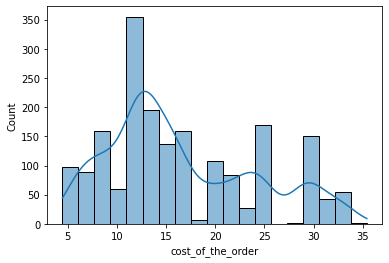

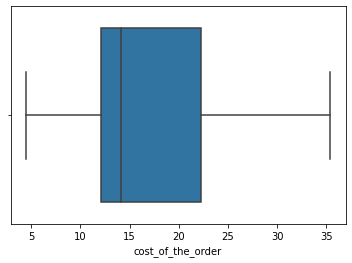

In [17]:
sns.histplot(data=df,x='cost_of_the_order',kde=True)
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

#### Observations:


*   The distribution of the cost of the order looks a little multi modal 
*   The boxplot indicates that the distribution is right skewed, however we do not seem to have any outliers
*   Most of the order costs are above the 50th quartile(14.14) 




### Observations on the food preparation times

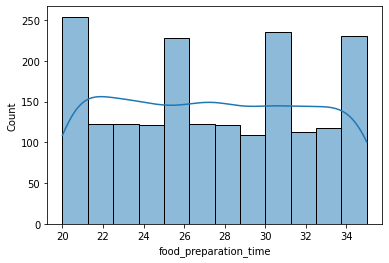

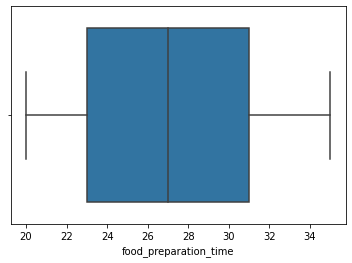

In [18]:
sns.histplot(data=df,x='food_preparation_time',kde=True)
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#### Observations:


*   The distributions looks uniform and has no outliers




### Observations on the delivery time

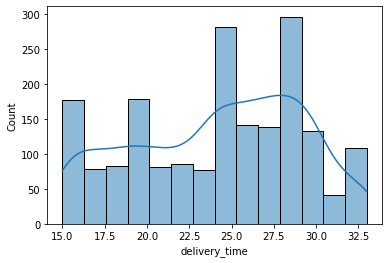

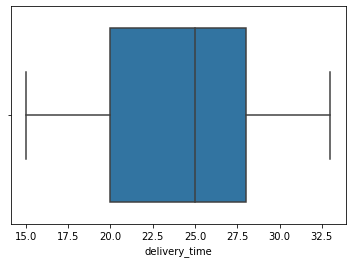

In [19]:
sns.histplot(data=df,x='delivery_time',kde=True)
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

#### Observations:


*   The delivery time is left skewed and not outliers indicating that the deliveries are done efficiently and under 25 minutes for most of the orders




### Observations on the rating for orders

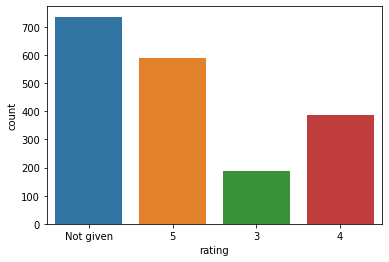

In [20]:
sns.countplot(data=df,x='rating')

#### Observations:


*   Among the orders rated most of the orders have a 5 or a 4 star rating
*   However over 38% of the orders are not rated which makes it dificult to assume that the food from this restaurant is highly rated
*   Maybe the unrated orders account for the 1 or 2 stars as we do not have any orders rated 1 or 2 stars in the dataset which is quite suspicious



### Observations on the cuisine type

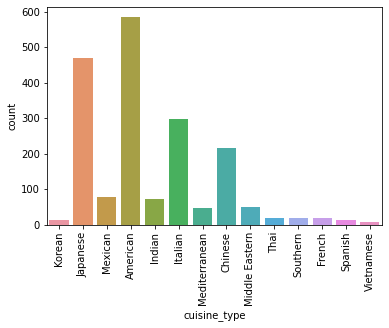

In [24]:
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation = 90);

#### Observations:


*   It looks like the most popular cuisine type is American followed by Japanese, Italian and Chinese
*   Korean, Vietnamese, spanish, french, thai and southern cuisines are the least popular among those who placed orders through this app 



### Observations on the day of the week

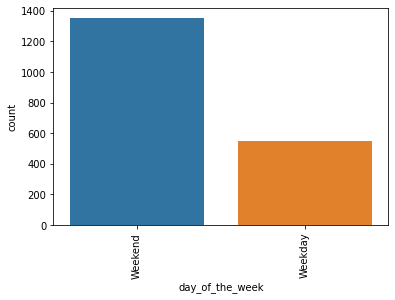

In [25]:
sns.countplot(data=df,x='day_of_the_week')
plt.xticks(rotation = 90);

#### Observations:


*   Most of the orders are usually placed on the weekend versus the weekday as shown from the count plot above
* The difference between the orders on Weekend versus weekdays is quite significant 
* The number or orders placed on the weekend is more than twice the orders placed on the weekday
* 71.18% of the orders are on the weekend versus 28.82% on the weekdays



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [33]:
#Getting information on the top five restaurants based on orders received
top_five=df.groupby(['restaurant_name']).order_id.count().reset_index()
top_five.sort_values(by=['order_id'],inplace=True,ascending=False)
top_five.head()

,restaurant_name,order_id
136,Shake Shack,219
153,The Meatball Shop,132
21,Blue Ribbon Sushi,119
20,Blue Ribbon Fried Chicken,96
109,Parm,68


#### Observations:

The top 5 restaurants with most number of orders is:

*   Shake Shack
*   The meatball shop 
*   Blue Ribbon Sushi
*   Blue Ribbon Friend Chicken
*   Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

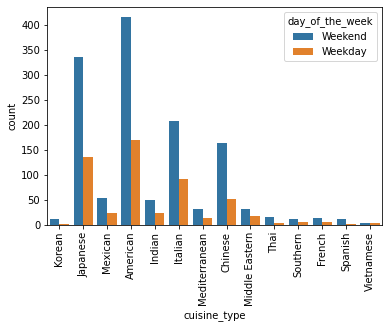

In [34]:
#plotting a countplot of cuisine type based on the day of the week 
sns.countplot(data=df,x='cuisine_type',hue='day_of_the_week')
plt.xticks(rotation = 90);

#### Observations:

*   American cuisine is the most popular cuisine on the weekend


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [100]:
#Creating a subset of the dataset to include only orders above 20 dollars
order_above_twenty=df[df['cost_of_the_order']>20.00]
#Calculating the percentage of orders above 20 dollars
result=(order_above_twenty.shape[0]/df.shape[0])*100
print(result)

29.24130663856691


#### Observations:


*   Over 29.24% of the orders are above 20 dollars



### **Question 10**: What is the mean order delivery time? [1 mark]

In [38]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:


*   Mean order delivery time is around 24.16 minutes



### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [46]:
#Getting the top 5 customers and the number of orders they placed
top_cust=df.groupby(['customer_id']).order_id.count().reset_index()
top_cust.sort_values(by=['order_id'],inplace=True,ascending=False)
top_cust.head(8)

,customer_id,order_id
116,52832,13
84,47440,10
333,83287,9
839,250494,8
216,65009,7
329,82041,7
847,259341,7
870,276192,7


#### Observations:


*   The minimum number of orders among the top customers is around 7 with the maximum being 13 orders.
*   Since around 4 customers have placed 7 orders each qualifying them to be in the top 5 spots. The company must decide if it wants to give the voucher to all 4 of them making the total customer count to be 8 who receive the voucher.



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Correlation by Heatmap for the three numeric variables

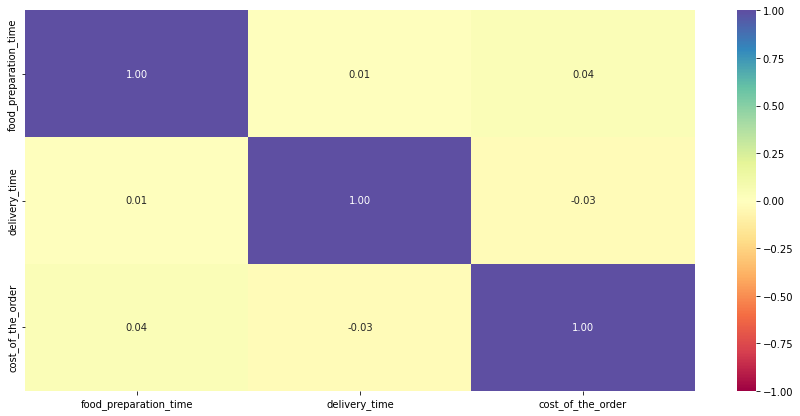

In [50]:
# Check for correlation among numerical variables
num_var = ['food_preparation_time','delivery_time','cost_of_the_order']

corr = df[num_var].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations

*   There is a weak correlations between the numerical variables which indicates that the variables are independent of each other





### Scatter plot of numeric variables

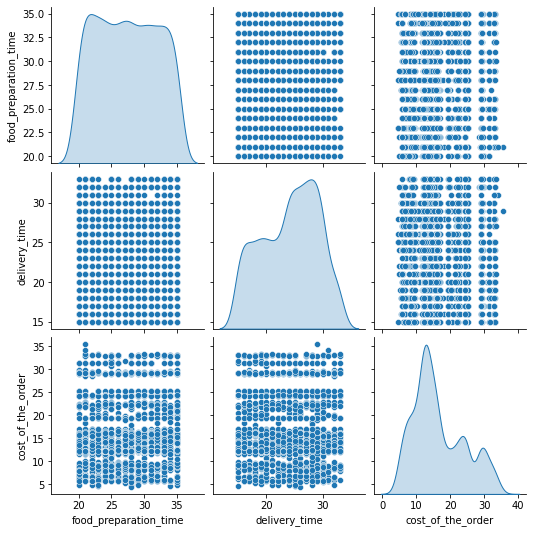

In [51]:
sns.pairplot(data=df[num_var], diag_kind="kde")
plt.show()

#### Observations:


*  We get the same insights as from the correlation plot
*  There is no positive or negative relationship between the variables



### Observation on cost of the order and cuisine type

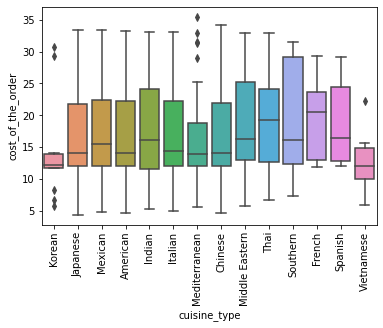

In [55]:
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation = 90);

#### Observations:


*   Korean and Vietnamese orders are of smaller sizes compared to the rest of the orders with very small number of outliers
*   There are more orders in the 3rd quantile for southern cuisine type indicating that people ordering southern food might be ordering more expensive food or in larger quantities








### Observations on the cost of the order based on the day of the week

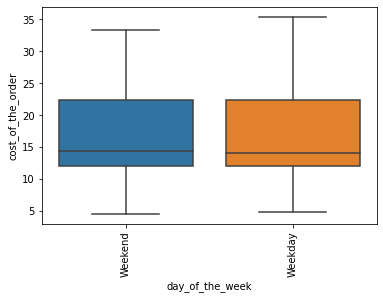

In [56]:
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order')
plt.xticks(rotation = 90);

#### Observations:


*   The median cost of the order does not seem to vary on the day of the week the order was placed



### Observations on cuisine type and food preparation time 

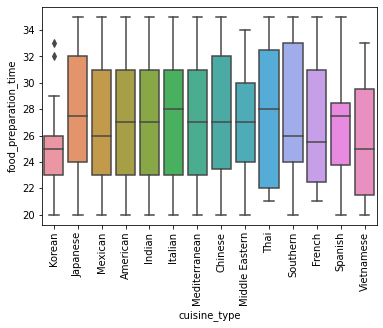

In [57]:
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation = 90);

#### Observations:


*  Southern cuisine looks like it has a slightly higher food preparation time compared to the rest as most orders prep times are above the median
*   Korean food has the lowest food preparation time
*   The median food preparation time for the top 3 cuisine types ordered is about the same. 



### Observation on delivery time based on the day of the week

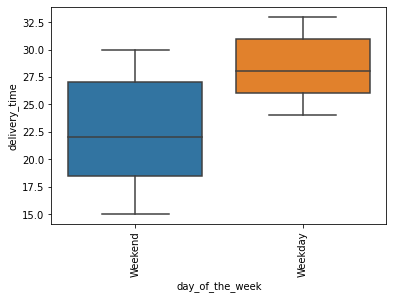

In [61]:
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.xticks(rotation = 90);  

#### Observations:


*   The median delivery time is higher on the weekdays than weekends
*   50% of the orders on weekdays take more than 28 minutes to deliver,
*   50% of the orders are delivered under 22 minutes during the weekends



### Observation on cuisine type and delivery times

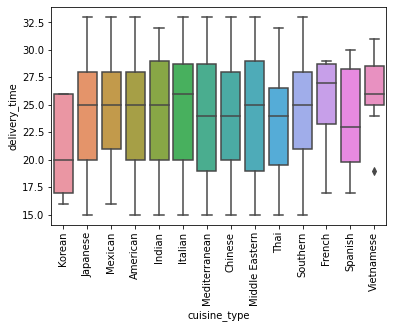

In [62]:
sns.boxplot(data=df, x='cuisine_type', y='delivery_time')
plt.xticks(rotation = 90);

#### Observations:



*   Vietnamese and French cuisine has a longer delivery time
*   Over 50% of the korean cuisine is delivered between 20-26 minutes
*   The median delivery time for korean cuisine is less than the other cuisines



### Observation on the day of the week and the tiem for food preparation

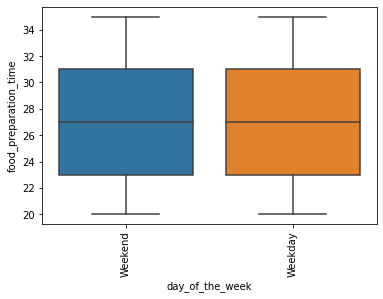

In [63]:
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time')
plt.xticks(rotation = 90); 

#### Observations:



*   The food preparation time is about the same on the weekday and weekend



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [8]:
#Creating a subset of the dataset to include only rows where the rating was given
qualified_dataset =df[df['rating']!= 'Not given']
print(qualified_dataset.info())
print(qualified_dataset.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 90.8+ KB
None
   order_id  customer_id            restaurant_name   cuisine_type  \
2   1477070        66393                Cafe Habana        Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken       American   
4   1478249        76942           Dirty Bir

In [9]:
#creating a new column for rating to convert it from object to integer data type in order to calculate average ratings
qualified_dataset['rating_numeric']=qualified_dataset['rating'].astype(int)

#aggregating by restaurant names to calculate the count and average ratings 
qualified=qualified_dataset.groupby(['restaurant_name','cuisine_type']).agg({'rating':'count','rating_numeric':'mean'}).reset_index()
qualified.sort_values(by=['rating'],ascending=False,inplace=True)
qualified.head()

,restaurant_name,cuisine_type,rating,rating_numeric
117,Shake Shack,American,133,4.28
17,Blue Ribbon Sushi,Japanese,73,4.22
133,The Meatball Shop,Italian,70,4.53
16,Blue Ribbon Fried Chicken,American,64,4.33
104,RedFarm Broadway,Chinese,41,4.24


In [101]:
#Extracting restaurant names that meet the given criteria for question 13
qualified=qualified[(qualified['rating_numeric']>4.00)&(qualified['rating']>50)]
print(qualified.info())
print(qualified.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 117 to 16
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_name  4 non-null      object 
 1   rating           4 non-null      int64  
 2   rating_numeric   4 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 128.0+ bytes
None
               restaurant_name  rating  rating_numeric
117                Shake Shack     133            4.28
132          The Meatball Shop      84            4.51
17           Blue Ribbon Sushi      73            4.22
16   Blue Ribbon Fried Chicken      64            4.33


#### Observations:


* The restaurants meeting the given criteria are also of the most popular cuisine types in the dataset, indicating the popularity of these cuisines.
*   Only 4 resturants satify the condition of having 50 or more ratings with an average rating of 4 or more
*  The resturant names are as follows:


          1.   Shake Shack
          2.   The meatball shop
          3.   Blue ribbon sushi
          4.   Blue ribbon fried chicken










### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [157]:
#Function to calculate the revenue based on the cost of the order
def revenue(cost):
    total_rev=[]
    collected_amount=0
    if (cost >20.00):
        collected_amount=cost * 0.25
    elif (cost >5.00 & cost):
        collected_amount=cost*0.15
    total_rev.append(round(collected_amount,2))
    return(total_rev)


In [171]:
#creating a new column with the revenue per order based on the cost of the order
df['revenue_per_order']=df['cost_of_the_order'].apply(revenue)

#Converting the 'revenue_per_order' column to string for further processing
df['revenue_per_order']=df['revenue_per_order'].astype(str)

#Replacing the square brackets from 'revenue_per_order' column and converting it into a floating point to calculate total revenue in the next step
df['revenue_per_order']=df['revenue_per_order'].str.replace("[\]\[]",'').astype(float)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue_per_order
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.69
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.81
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.83
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.30
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.74


In [168]:
#Calculating the total revenue
sum(df['revenue_per_order'])

6166.499999999992

In [7]:
df_c1=df[df['customer_id']==358141]
df_c1.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23


#### Observations:

*  The total revenue based on the fees charged based on the cost of the order is $6166.50





### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [173]:
#creating a new column called total time which is a sum of the food preparation time and delivery time for an order
df['total_time']=df['food_preparation_time']+df['delivery_time']

#creating a smaller dataframe with orders whose total time is greater than 60 minutes
order_over_60=df[df['total_time']>60]

#calculating the percent of orders that take more than 60 minutes 
result=(order_over_60.shape[0]/df.shape[0])*100
print(result)

10.537407797681771


#### Observations:

*  It looks like around 10.53% of orders take more than 60 minutes to get delivered from the time the order is placed




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [129]:
#aggregating on the day of the week to determine the average delivery times based on the day of the week
df.groupby(['day_of_the_week']).delivery_time.mean()

day_of_the_week
Weekday   28.34
Weekend   22.47
Name: delivery_time, dtype: float64

### Analyzing the average order cost for different types of cuisines (Additional Analyses)

In [5]:
df.groupby(['cuisine_type']).agg({'cost_of_the_order':'mean','order_id':'count'})

,cost_of_the_order,order_id
cuisine_type,,
American,16.32,584
Chinese,16.31,215
French,19.79,18
Indian,16.92,73
Italian,16.42,298
Japanese,16.30,470
Korean,14.00,13
Mediterranean,15.47,46
Mexican,16.93,77


#### Observations:


*   On the weekdays the average delivery time is 28.34 
*   On the weekend the average delivery time is 22.47



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

We analyzed a dataset of around 1900 restaurant orders in New York for a food delivery app called FoodHub. The objective of the analysis was to get a fair idea about demands from different restaurants to enhance customer service. Our analysis revealed the following insights about the demand for food delivery.

1. The average cost of the order was around $16.50 
2. The average processing time from once the order is received to delivery of the order is around 51.53 minutes 
3. The average delivery times on weekdays is higher than on weekends despite more orders being placed on the weekends. This could be due to various factors like more traffic,lack of availability of delivery drivers on weekdays etc.
4. Its looks like American, Japanese, Italian and Chinese are the most popular cuisines for ordering online
5. French, Southern and Thai have a slightly higher average cost per order.

### Recommendations:

1. As over 38% of orders do not have any ratings, maybe create a reward program to incentivize more user ratings of orders upon delivery
2. Alternatively, since delivery times are higher over the weekdays, analyze the availability of drivers and incentivize drivers to turn on their app for delivery on weekdays
3. Provide promotional offers to restaurants serving  French, Southern and Thai cuisines to increase the number of orders which helps in generating higher revenue
4. More data should be procured on different types of cuisines and ratings to buil

---